<a href="https://colab.research.google.com/github/AhmedCoolProjects/CV/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv("/content/NSE-Tata-Global-Beverages-Limited.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
# let's set the index to be the date
df.set_index("Date", inplace=True)

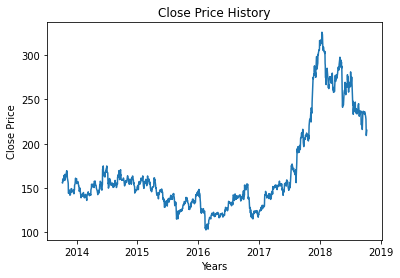

In [6]:
# let's plot the Close column 
plt.plot(df["Close"])
plt.title("Close Price History")
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.show()

In [7]:
data = df.sort_index(ascending=True, axis=0)
data = data[["Close"]]
data.head()

,Close
Date,
2013-10-08,155.80
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2013-10-08 to 2018-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1235 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [9]:
# create numpy array from data
training_set = data.to_numpy()
# to transform features by scaling each feature to a given range (usually 0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))
# to rescale our features to have a mean as 0 and a variance of 1 and bring them down to a common scale without distorting the distribution
scaled_training_set = scaler.fit_transform(training_set)

In [10]:
# The X_train would be a list of 60 values followed by the label in Y_train
X_train, Y_train = [], []
for i in range(60, training_set.shape[0]):
    X_train.append(scaled_training_set[i-60:i, 0])
    Y_train.append(scaled_training_set[i, 0])
# convert our lists to numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)
# Reshaping our X_train to 3rd dim and Y_train to 2nd dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
Y_train = np.reshape(Y_train, (Y_train.shape[0], 1))
print(X_train.shape, Y_train.shape)

(1175, 60, 1) (1175, 1)


In [11]:
# create model
lstm_model = Sequential()
# Building our layers
'''
Long Short-Term Memory (LSTM)
This layer will choose different implementations (cuDNN or pure TensorFlow) to maximize the performance of the model.
'''
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
'''
Dropout, this layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
'''
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
'''
Dense, this layer is fully connected layer, and each neuron receives input from all the neurons of previous layer.
'''
lstm_model.add(Dense(units=1))

In [12]:
lstm_model.compile(optimizer="adam", loss="mean_squared_error")
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [13]:
lstm_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 16s 120ms/step - loss: 0.0262
Epoch 2/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0054
Epoch 3/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0051
Epoch 4/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0044
Epoch 5/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0043
Epoch 6/100
37/37 [==============================] - 5s 123ms/step - loss: 0.0037
Epoch 7/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0033
Epoch 8/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0031
Epoch 9/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0037
Epoch 10/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0033
Epoch 11/100
37/37 [==============================] - 5s 122ms/step - loss: 0.0033
Epoch 12/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0030
Epoch 13/100

In [14]:
# save json file that contains model architecture
lstm_model_json = lstm_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(lstm_model_json)
# save weights of model
lstm_model.save_weights("model.h5")

In [15]:
X_test, Y_test = [], []
for i in range(60,80):
  X_test.append(scaled_training_set[i-60:i, 0])
  Y_test.append(scaled_training_set[i,0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(Y_test, (Y_test.shape[0], 1))

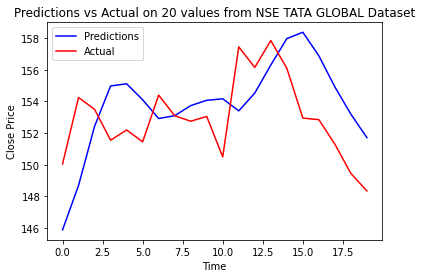

In [16]:
X_test, Y_test = [], []
for i in range(120, 140):
    X_test.append(scaled_training_set[i-60:i, 0])
    Y_test.append(scaled_training_set[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], 1))
# make predictions
X_test_predictions = lstm_model.predict(X_test)
# invert predictions
X_test_predictions = scaler.inverse_transform(X_test_predictions)
# invert the scaling for actual
Y_test = scaler.inverse_transform(Y_test)
# Visualize the predictions and actual values
plt.plot(X_test_predictions, color="blue",label="Predictions")
plt.plot(Y_test, color="red", label="Actual")
plt.title("Predictions vs Actual on 20 values from NSE TATA GLOBAL Dataset")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


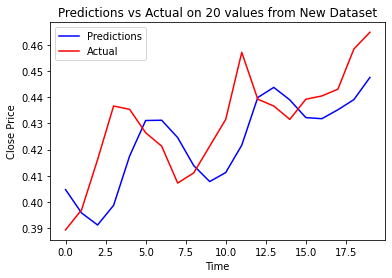

In [17]:
df2 = pd.read_csv("/content/stock_data.csv")
data2 = df2[['Close', 'Date']]
data2['Date'] = pd.to_datetime(data2['Date'], format='%Y-%m-%d')
data2.set_index('Date', inplace=True)
data2 = data2.sort_index(ascending=True, axis=0)
data2_array = data2.to_numpy()[:100]
scaled_data2 = scaler.fit_transform(data2_array)
X_test_2, Y_test_2 = [], []
for i in range(60, 80):
    X_test_2.append(scaled_data2[i-60:i, 0])
    Y_test_2.append(scaled_data2[i, 0])
X_test_2, Y_test_2 = np.array(X_test_2), np.array(Y_test_2)
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
Y_test_2 = np.reshape(Y_test_2, (Y_test_2.shape[0], 1))
# make predictions
X_test_predictions_2 = lstm_model.predict(X_test_2)
# invert predictions
X_test_predictions_2 = scaler.inverse_transform(X_test_predictions_2)
# invert the scaling for actual
Y_test_2 = scaler.inverse_transform(Y_test_2)
# Visualize the predictions and actual values
plt.plot(X_test_predictions_2, color="blue", label="Predictions")
plt.plot(Y_test_2, color="red", label="Actual")
plt.title("Predictions vs Actual on 20 values from New Dataset")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()